In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Dataset

In [ ]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

- Dataset has 7043 rows and 21 columns

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Checking Null Values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- TotalCharges should be float type but it is in object type.
- After appltying astype() method on TotalCharges column we encountered an error indicating presence of cell with blank space as value

In [ ]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df["TotalCharges"].nunique()

6531

In [ ]:
df.shape[0]

7043

In [ ]:
df.loc[df["TotalCharges"]== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- We can confirm the presence of space as value in above table.

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

- Replacing the space with null value.

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df["TotalCharges"]=df["TotalCharges"].astype(float)
df["TotalCharges"].dtypes

dtype('float64')

- Converting "TotalCharges" from object to float

In [ ]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

- Filling null value using mean.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no null values in the dataset. Hence we can proceed.

#Visualization

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


#Personal Details

Male      3555
Female    3488
Name: gender, dtype: int64


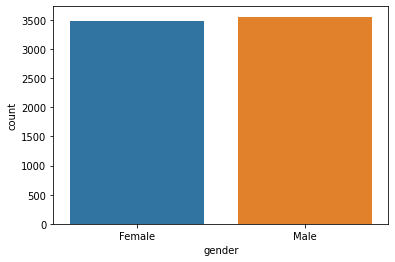

In [ ]:
sns.countplot(df["gender"])
print(df["gender"].value_counts())

- There are 3488 female and 3555 male telecom customers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


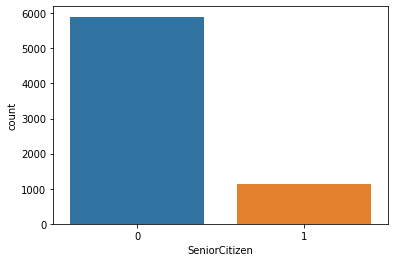

In [ ]:
sns.countplot(df["SeniorCitizen"])
print(df["SeniorCitizen"].value_counts())

- There are 1142 senior citizen and 5901 non-senior citizen among the customer.

No     3641
Yes    3402
Name: Partner, dtype: int64


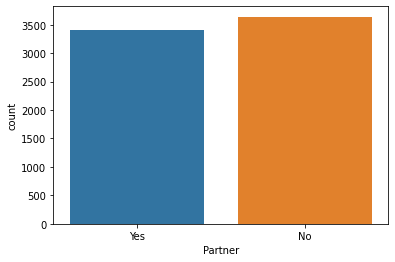

In [ ]:
sns.countplot(df["Partner"])
print(df["Partner"].value_counts())

- 3402 customers have partners while 3641 customers does not have any partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


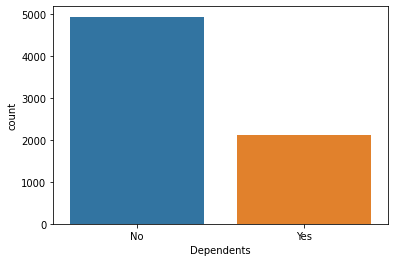

In [ ]:
sns.countplot(df["Dependents"])
print(df["Dependents"].value_counts())

- There are 2110 dependents and 4933 non-dependents customers.

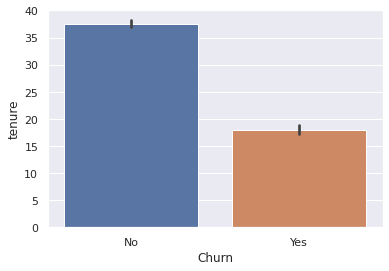

In [ ]:
sns.barplot(x=df["Churn"],y=df["tenure"])

- There is no customer churn when the tenure is high and vice-versa is also true.

#Telecom Services

Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64




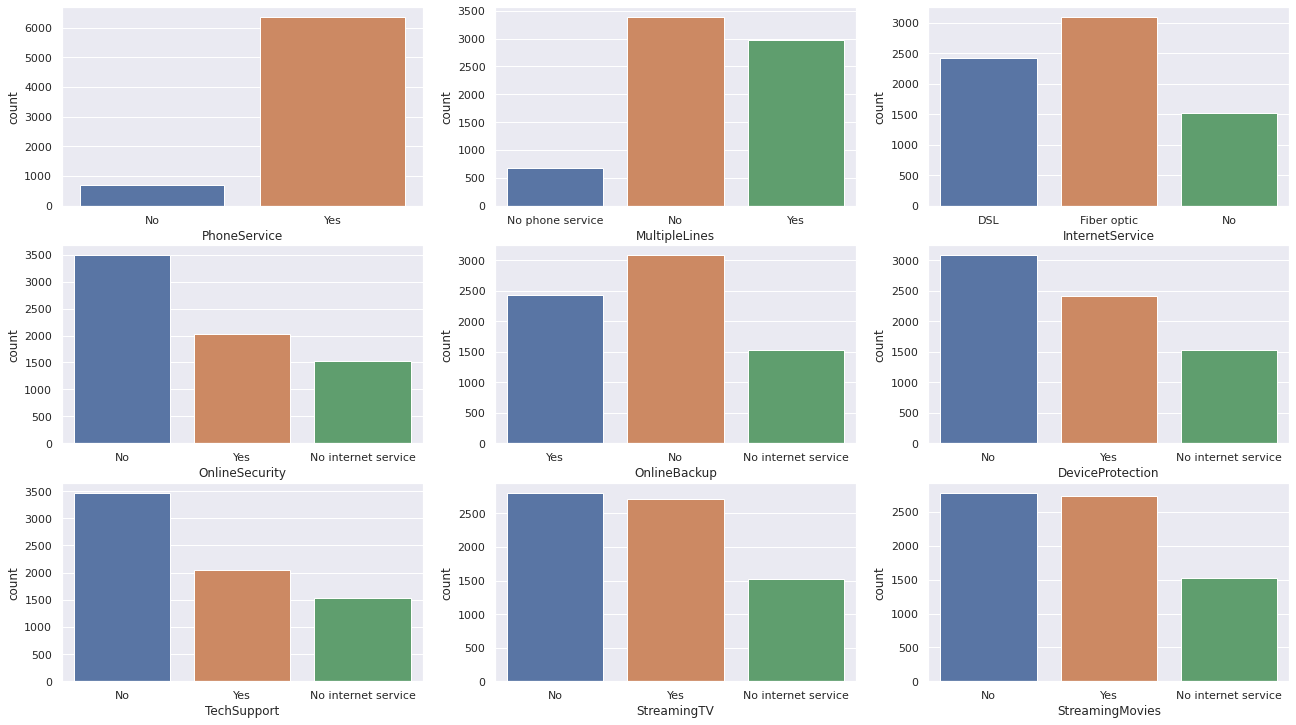

In [ ]:
sns.set()
fig,axes=plt.subplots(3,3,figsize=(22,12))
plt.subplots_adjust(bottom=0.1)
sns.countplot(df["PhoneService"],ax=axes[0,0])
axes[0,0].set_xlabel("PhoneService")
print(df["PhoneService"].value_counts())
print("\n")

sns.countplot(df["MultipleLines"],ax=axes[0,1])
axes[0,1].set_xlabel("MultipleLines")
print(df["MultipleLines"].value_counts())
print("\n")

sns.countplot(df["InternetService"],ax=axes[0,2])
axes[0,2].set_xlabel("InternetService")
print(df["InternetService"].value_counts())
print("\n")

sns.countplot(df["OnlineSecurity"],ax=axes[1,0])
axes[1,0].set_xlabel("OnlineSecurity")
print(df["OnlineSecurity"].value_counts())
print("\n")

sns.countplot(df["OnlineBackup"],ax=axes[1,1])
axes[1,1].set_xlabel("OnlineBackup")
print(df["OnlineBackup"].value_counts())
print("\n")

sns.countplot(df["DeviceProtection"],ax=axes[1,2])
axes[1,2].set_xlabel("DeviceProtection")
print(df["DeviceProtection"].value_counts())
print("\n")

sns.countplot(df["TechSupport"],ax=axes[2,0])
axes[2,0].set_xlabel("TechSupport")
print(df["TechSupport"].value_counts())
print("\n")

sns.countplot(df["StreamingTV"],ax=axes[2,1])
axes[2,1].set_xlabel("StreamingTV")
print(df["StreamingTV"].value_counts())
print("\n")

sns.countplot(df["StreamingMovies"],ax=axes[2,2])
axes[2,2].set_xlabel("StreamingMovies")
print(df["StreamingMovies"].value_counts())
print("\n")

PhoneService
- 6361 customers have PhoneService
- 682 customers dont have PhoneService

MultipleLines
- 3390 customers dont have MultipleLines
- 2971 customers have MultipleLines
- 682 customers have No phone service  

InternetService
- 3096 customers have Fiber optic    
- 2421 customers have DSL         
- 1526 customers dont have InternetService

OnlineSecurity
- 3498 customers dont have OnlineSecurity
- 2019 customers have OnlineSecurity
- 1526 customers have No internet service

OnlineBackup
- 3088 customers dont have OnlineBackup
- 2429 customers have OnlineBackup
- 1526 customers have No internet service 

DeviceProtection
- 3095 customers have No DeviceProtection 
- 2422 customers have DeviceProtection
- 1526 have No internet service 

TechSupport
- 3473 customers dont have TechSupport
- 2044 customers have TechSupport
- 1526 customer have No internet service 

StreamingTV
- 2810 customers dont have StreamingTV
- 2707 customers have StreamingTV
- 1526 customers have No internet service 

StreamingMovies
- 2785 customers dont have StreamingMovies
- 2732 customers have StreamingMovies
- 1526 have No internet service 

#Telecom Payment and Bills

In [ ]:
c=df.columns.get_loc("Contract")
c

15

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


No     5174
Yes    1869
Name: Churn, dtype: int64




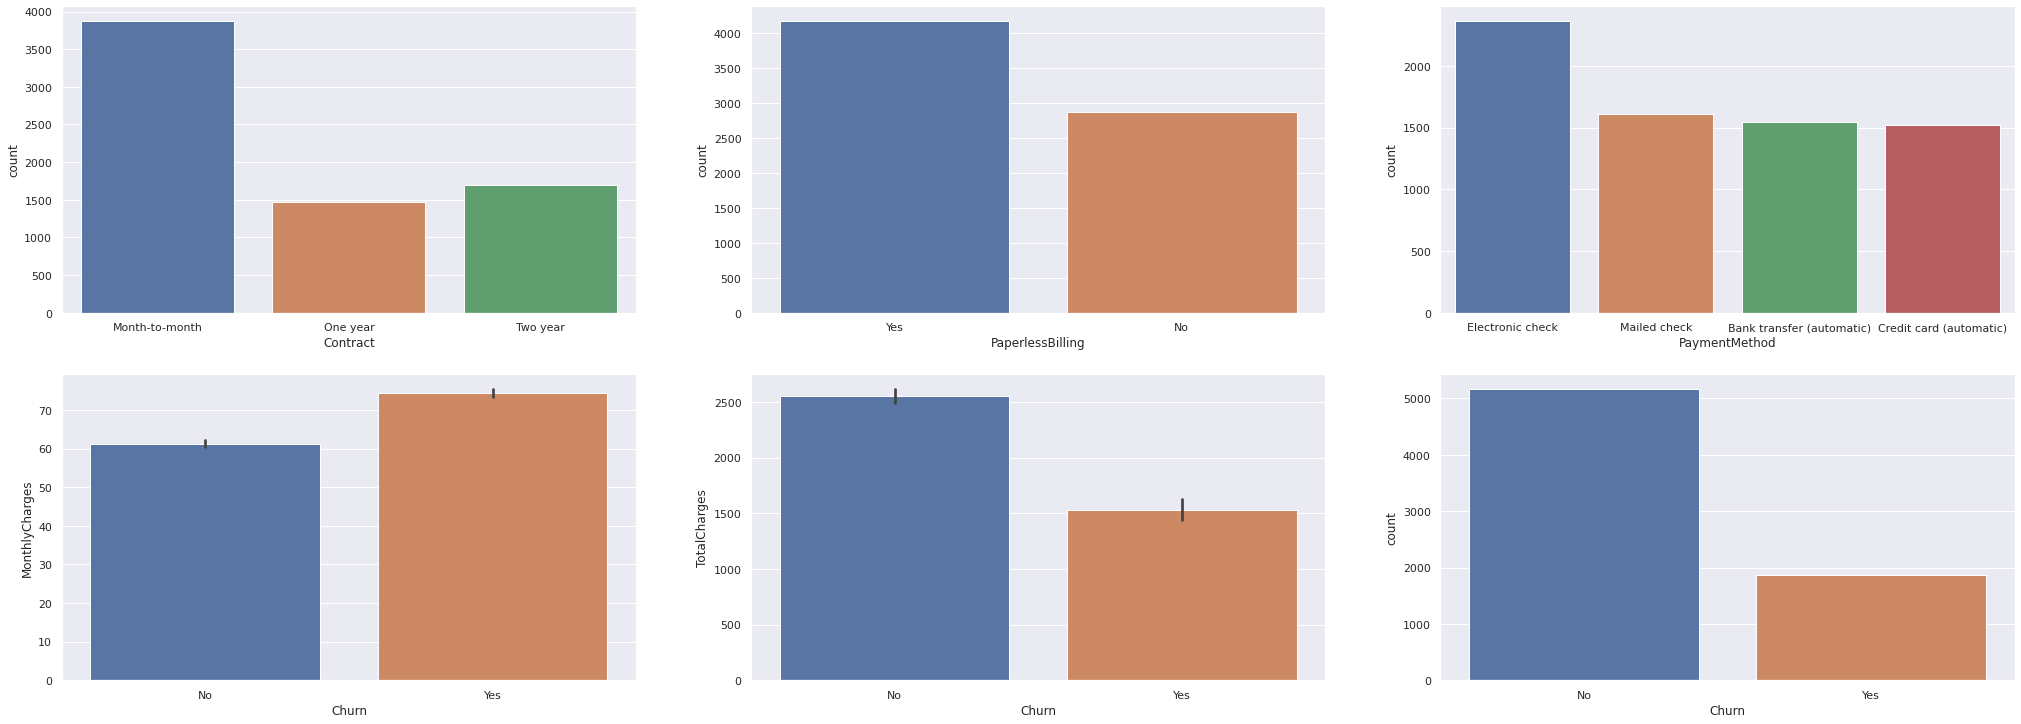

In [ ]:
sns.set()
fig,axes=plt.subplots(2,3,figsize=(35,12))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
for i in df.iloc[:,15:]:
  if df[i].dtypes==object:
    sns.countplot(df[i],ax=axes[j,k])
    axes[j,k].set_xlabel(i)
    print(df[i].value_counts())
    print("\n")
    k=k+1
  else:
    sns.barplot(x="Churn",y=i,data=df,ax=axes[j,k])
    axes[j,k].set_ylabel(i)
    k=k+1

  
  if k==3 and j<2:
    k=0
    j=j+1

Contract
- 3875 customer have used Month-to-month Contract
- 1695 customer have used Two year Contract         
- 1473 customer have used One year Contract         

PaperlessBilling
- 4171 customer have used PaperlessBilling 
- 2872 customer didnot use PaperlessBilling

PaymentMethod
- 2365 customer have used Electronic check            
- 1612 customer have used Mailed check                 
- 1544 customer have used Bank transfer (automatic)    
- 1522 customer have used Credit card (automatic)      

Monthly Charges
- Churn rate is high when monthly charges are high

Total Charges
- Churn rate is comparitively low when Total charges are high

Churn
- 5174 customers didnot Churn
- 1869 customers have Churn

In [ ]:
sns.pairplot(df)

#Describing Data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- There is huge gap between 75% and Max value which indicates presence of outlier in SeniorCitizen.

- Data is widely spread in most of the features.

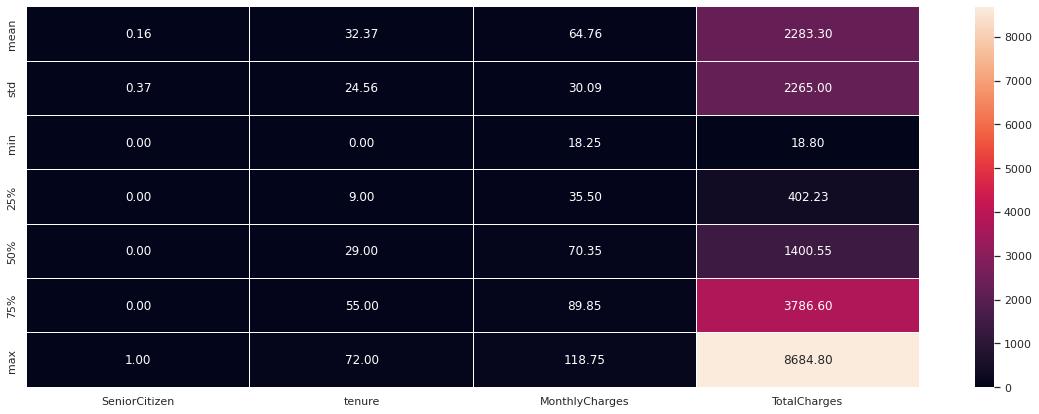

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

SeniorCitizen	
- mean -	0.162147	
- std	- 0.368612	
- min	- 0.000000	
- max	- 1.000000	

tenure	
- mean -	32.371149	
- std	- 24.559481	
- min	- 0.000000	
- max	- 72.000000	

MonthlyCharges	
- mean -		64.761692
- std	- 30.090047	
- min	- 18.250000	
- max	- 118.750000	

TotalCharges
- mean -	2283.300441
- std	- 2265.000258
- min	- 18.800000
- max	-	8684.800000

# Encoding Categorical Features

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df:
  if df[i].dtypes==object:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# Checking correlation

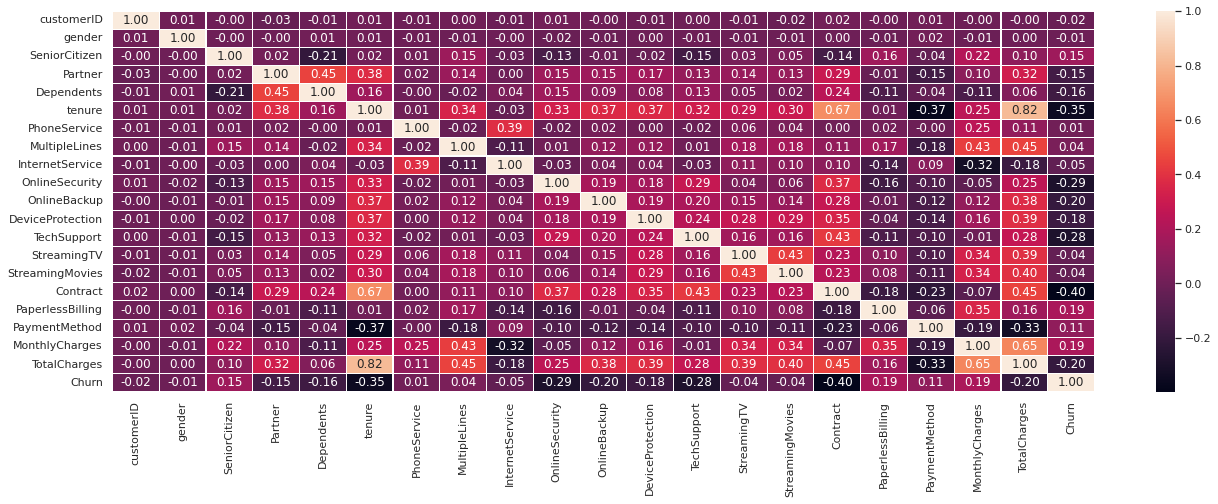

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linecolor="white",linewidths=0.1,fmt="0.2f")

- CustomerID has -2 percent correlation with target column which is considered as a weak -ve bond.
- Gender has -1 percent correlation with target column which is considered as a weak -ve bond.
- SeniorCitizen has 15 percent correlation with target column which is considered as a weak +ve bond.
- Partnter has -15 percent correlation with target column which is considered as a strong -ve bond.
- Dependents has -16 percent correlation with target column which is considered as a strong -ve bond.
- Tenure has -35 percent correlation with target column which is considered as a very strong -ve bond.
- PhoneService has 1 percent correlation with target column which is considered as a very weak +ve bond.
- MultipleLine has 4 percent correlation with target column which is considered as a weak +ve bond.
- InternetService has -5 percent correlation with target column which is considered as a weak -ve bond.
- OnlineSecurity has -29 percent correlation with target column which is considered as a very strong -ve bond.
- OnlineBackup has -20 percent correlation with target column which is considered as a very strong -ve bond.
- DeviceProtection has -18 percent correlation with target column which is considered as a very strong -ve bond.
- TechSupporthas -28 percent correlation with target column which is considered as a weak -ve bond.
- StreamingTV has -4 percent correlation with target column which is considered as a weak -ve bond.
- StreamingMovies has -4 percent correlation with target column which is considered as a weak -ve bond.
- Contract has -40 percent correlation with target column which is considered as a very strong -ve bond.
- PaperBilling has 19 percent correlation with target column which is considered as a very weak +ve bond.
- PaymentMethod has 11 percent correlation with target column which is considered as a very weak +ve bond.
- MonthlyCharges has 19 percent correlation with target column which is considered as a very weak +ve bond.
- TotalCharges has -20 percent correlation with target column which is considered as a very strong -ve bond.

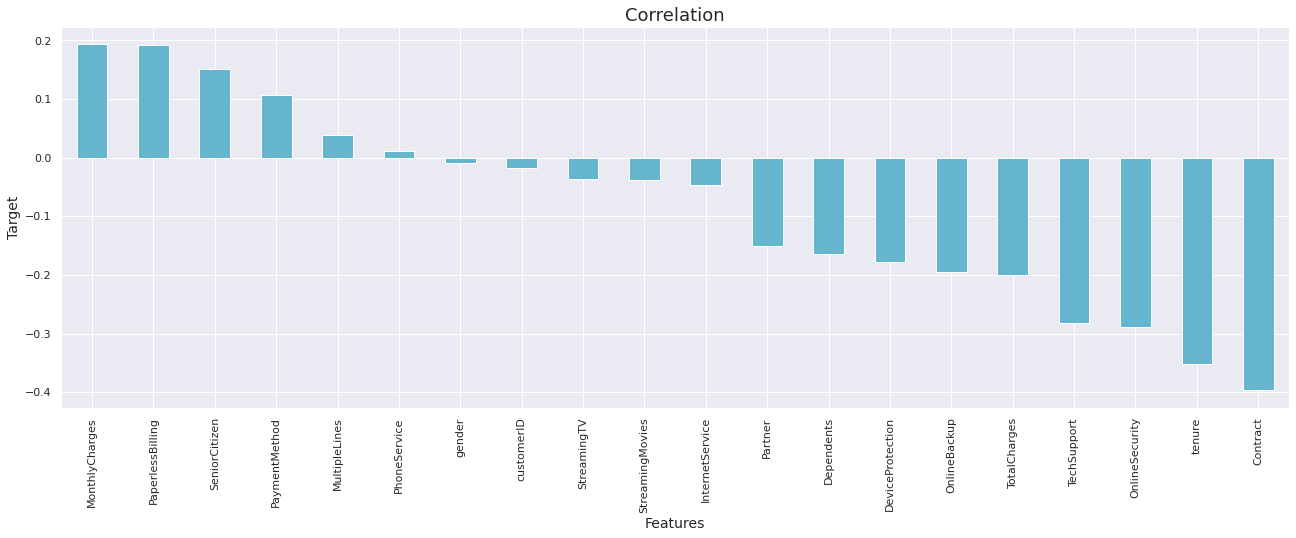

In [ ]:
plt.figure(figsize=(22,7))
df.corr()["Churn"].sort_values(ascending=False).drop(["Churn"]).plot(kind="bar",color="c")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Max +ve correlation - MonthlyCharges
- Min +ve correlation - PhoneService
- Max -ve correlation - Contract
- Min -ve correlation - gender

#Detecting Outliers

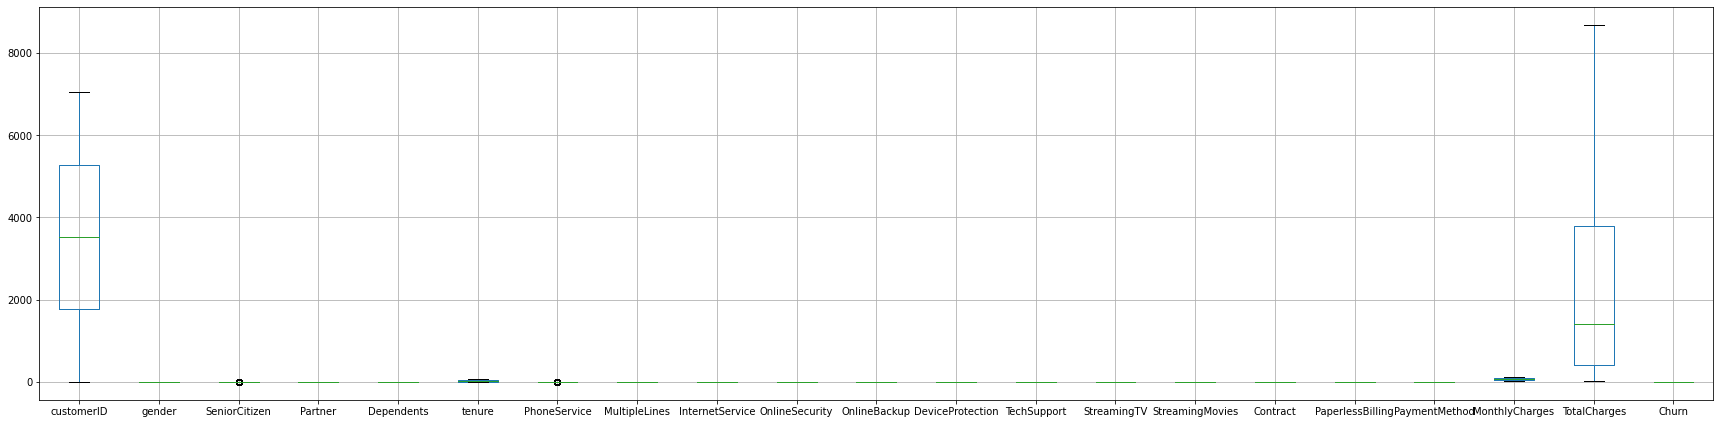

In [ ]:
df.iloc[:,:].boxplot(figsize=(30,7))
plt.subplots_adjust(bottom=0.1)

The outlier is detected in the following features,
- SeniorCitizen
- PhoneService

Since both the feature are categorical, we cannot remove the outliers

#Separating input and output features

In [ ]:
x=df.drop(["Churn"],axis=1)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y=df["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Detecting Skewness

In [ ]:
x.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
SeniorCitizen       1.833633
dtype: float64

Keeping +/- 0.5 as the skew range, following features can be considered skewed
- PhoneService
- Contract
- Dependents
- TotalCharges
- Senior Citizen

Since only TotalCharges is non categorical feature, hence its skewness can be removed

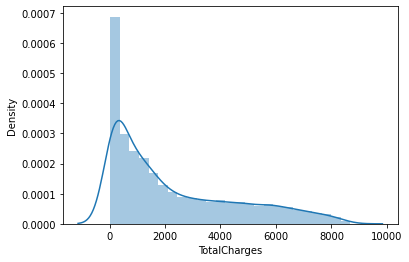

In [ ]:
sns.distplot(df["TotalCharges"])

- It is right skewed

In [ ]:
from sklearn.preprocessing import power_transform
df["TotalCharges"]=power_transform(df["TotalCharges"].values.reshape(-1,1))

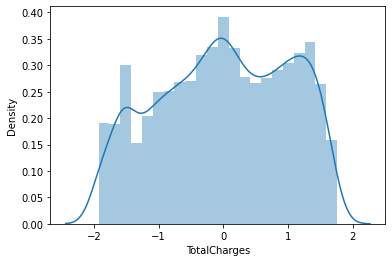

In [ ]:
sns.distplot(df["TotalCharges"])

In [ ]:
df["TotalCharges"].skew()

-0.1448992821832902

-0.046563342221944

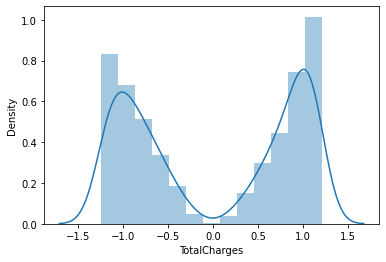

In [ ]:
n=np.cbrt(df["TotalCharges"])
sns.distplot(n)
n.skew()

- Testing to check if graph can be normally distributed.

In [ ]:
df["TotalCharges"]=np.cbrt(df["TotalCharges"])
df["TotalCharges"].skew()

-0.046563342221944

In [ ]:
df.skew().sort_values

<bound method Series.sort_values of customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.046563
Churn               1.063031
dtype: float64>

# Detecting Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif=pd.DataFrame()
  vif["variable"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]

  return (vif)

In [ ]:
calc_vif(x)

,variable,VIF
0,customerID,3.703222
1,gender,1.960498
2,SeniorCitizen,1.369732
3,Partner,2.822017
4,Dependents,1.963586
5,tenure,15.081652
6,PhoneService,15.253887
7,MultipleLines,2.754611
8,InternetService,4.353280
9,OnlineSecurity,2.259471


- Since VIF>5, it indicates presence of multicollinearity
- After looking at the correlation matrix, it was observed that the MonthlyCharges contribution towards the target column is slightly less than TotalCharges, hence we drop the former.

In [ ]:
x=x.drop(["MonthlyCharges"],axis=1)
calc_vif(x)

,variable,VIF
0,customerID,3.591954
1,gender,1.947594
2,SeniorCitizen,1.344840
3,Partner,2.816559
4,Dependents,1.963394
5,tenure,13.790930
6,PhoneService,8.833837
7,MultipleLines,2.525062
8,InternetService,3.651671
9,OnlineSecurity,2.258095


#Oversampling

In [ ]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(x,y)

y=y_new
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

#Scaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)


             0    1    2    3    4         5    6    7    8    9    10   11  \
0      0.763277  0.0  0.0  1.0  0.0  0.013889  0.0  0.5  0.0  0.0  1.0  0.0   
1      0.562624  1.0  0.0  0.0  0.0  0.472222  1.0  0.0  0.0  1.0  0.0  1.0   
2      0.364101  1.0  0.0  0.0  0.0  0.027778  1.0  0.0  0.0  1.0  1.0  0.0   
3      0.785998  1.0  0.0  0.0  0.0  0.625000  0.0  0.5  0.0  1.0  0.0  1.0   
4      0.924595  0.0  0.0  0.0  0.0  0.027778  1.0  0.0  0.5  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...   
10343  0.432264  0.0  0.0  0.0  0.0  0.916667  1.0  1.0  0.0  0.5  0.0  1.0   
10344  0.233456  1.0  0.0  0.0  0.0  0.097222  1.0  0.0  0.5  0.0  0.0  0.0   
10345  0.152798  0.0  0.0  0.0  0.0  0.055556  1.0  1.0  0.5  0.0  0.5  0.0   
10346  0.269384  1.0  0.0  0.0  0.0  0.138889  0.0  0.5  0.0  0.0  0.0  0.0   
10347  0.595427  1.0  0.0  0.0  0.0  0.138889  1.0  0.0  0.5  0.5  0.5  0.5   

        12   13   14   15   16        17        18 

# Training and Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report,auc,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
lg=LogisticRegression()


In [ ]:
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lg.fit(x,y)
  pred_train=lg.predict(x_train)
  pred_test=lg.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    print("At Random State : ",i)
    print("Train Accuracy : ",round(accuracy_score(y_train,pred_train)*100,2))
    print("Test Accuracy : ",round(accuracy_score(y_test,pred_test)*100,2))
    print("\n")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=999)
lg.fit(x,y)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy : ",round(accuracy_score(y_train,pred_train)*100,2))
print("Test Accuracy : ",round(accuracy_score(y_test,pred_test)*100,2))

Train Accuracy :  80.37
Test Accuracy :  82.27


In [ ]:
print("Classification Report:\n",classification_report(y_test,pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81      1046
           1       0.79      0.88      0.83      1024

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



#Cross Validation

In [ ]:
ls=accuracy_score(y_test,pred_test)

for j in range(2,20):
  cv_score=cross_val_score(lg,x,y,cv=j)
  print(cv_score)
  print("At cv:",j)
  print("cv score : ", cv_score.mean()*100)
  print("Accuracy : ",ls*100)
  print("\n")

[0.71511403 0.82083494]
At cv: 2
cv score :  76.79744878237341
Accuracy :  82.27053140096618


[0.67652174 0.82052769 0.8376341 ]
At cv: 3
cv score :  77.82278417184565
Accuracy :  82.27053140096618


[0.70738307 0.78855818 0.82643989 0.84538075]
At cv: 4
cv score :  79.19404715887129
Accuracy :  82.27053140096618


[0.72222222 0.7410628  0.82125604 0.83905268 0.84533591]
At cv: 5
cv score :  79.37859312650748
Accuracy :  82.27053140096618


[0.72753623 0.7142029  0.82318841 0.82898551 0.83642691 0.85092807]
At cv: 6
cv score :  79.68780053128887
Accuracy :  82.27053140096618


[0.73630832 0.72008114 0.78552097 0.82002706 0.83558863 0.84235453
 0.84979702]
At cv: 7
cv score :  79.85253828095561
Accuracy :  82.27053140096618


[0.74111283 0.72333849 0.72874807 0.83307573 0.83217324 0.82907966
 0.84377417 0.85228152]
At cv: 8
cv score :  79.79479625758005
Accuracy :  82.27053140096618


[0.73826087 0.73478261 0.71304348 0.82173913 0.82347826 0.83478261
 0.83478261 0.84508268 0.85291558]


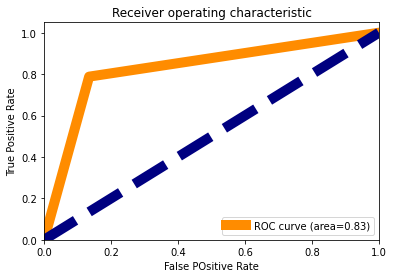

In [ ]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()


#Model Selection

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,x,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighbors Classifier

Accuracy of training model : 85.53
Accuracy of test data : 79.23
cv score :  78.17

Classification report for test data
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1046
           1       0.76      0.85      0.80      1024

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.80      0.85      4128
           1       0.82      0.91      0.86      4150

    accuracy                           0.86      8278
   macro avg       0.86      0.86      0.85      8278
weighted avg       0.86      0.86      0.85      8278

Confusion Matrix
 [[770 276]
 [154 870]]




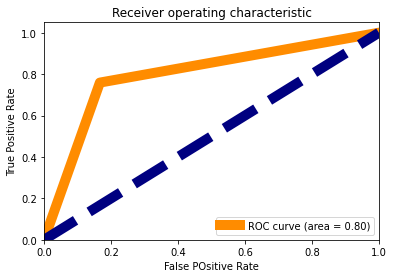

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVM Model

Accuracy of training model : 84.94
Accuracy of test data : 84.11
cv score :  81.62

Classification report for test data
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1046
           1       0.83      0.85      0.84      1024

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Classification report for training data
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      4128
           1       0.84      0.87      0.85      4150

    accuracy                           0.85      8278
   macro avg       0.85      0.85      0.85      8278
weighted avg       0.85      0.85      0.85      8278

Confusion Matrix
 [[866 180]
 [149 875]]




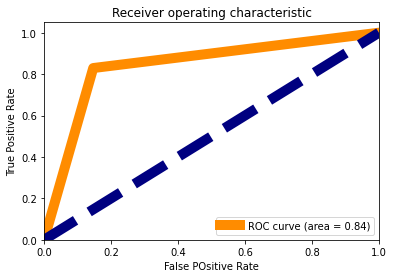

In [ ]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 79.47
cv score :  78.54

Classification report for test data
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1046
           1       0.79      0.80      0.79      1024

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4128
           1       1.00      1.00      1.00      4150

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Confusion Matrix
 [[828 218]
 [207 817]]




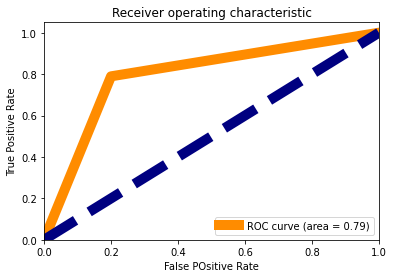

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

# Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,100,25)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50, 'oob_score': 'True'}


Accuracy of training model : 99.98
Accuracy of test data : 85.85
cv score :  83.58

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1046
           1       0.85      0.87      0.86      1024

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4128
           1       1.00      1.00      1.00      4150

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Confusion Matrix
 [[890 156]
 [137 887]]




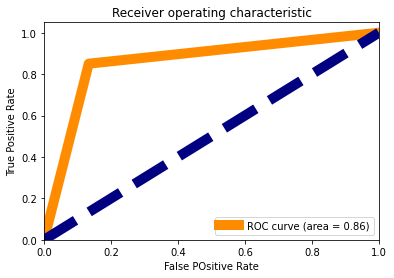

In [ ]:
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='gini', max_features= 'log2', oob_score= 'True')
model_selection(rf,x_train,y_train,x_test,y_test)

# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0],
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 75, 'random_state': 0}


Accuracy of training model : 82.81
Accuracy of test data : 83.62
cv score :  81.37

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1046
           1       0.81      0.88      0.84      1024

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Classification report for training data
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      4128
           1       0.80      0.88      0.84      4150

    accuracy                           0.83      8278
   macro avg       0.83      0.83      0.83      8278
weighted avg       0.83      0.83      0.83      8278

Confusion Matrix
 [[832 214]
 [125 899]]




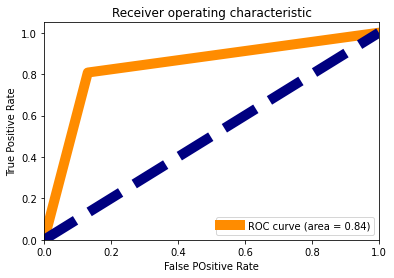

In [ ]:
rf2=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators= 75,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,25)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'exponential', 'max_features': 'auto', 'n_estimators': 75}


Accuracy of training model : 88.46
Accuracy of test data : 84.35
cv score :  81.94

Classification report for test data
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1046
           1       0.83      0.86      0.84      1024

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4128
           1       0.88      0.89      0.89      4150

    accuracy                           0.88      8278
   macro avg       0.88      0.88      0.88      8278
weighted avg       0.88      0.88      0.88      8278

Confusion Matrix
 [[863 183]
 [141 883]]




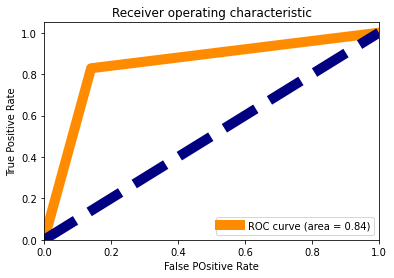

In [ ]:
rf3=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0, loss='exponential', max_features= 'auto', n_estimators= 75)
model_selection(rf3,x_train,y_train,x_test,y_test)

# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,25),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 25, 'oob_score': True, 'random_state': 25}


Accuracy of training model : 100.0
Accuracy of test data : 85.56
cv score :  83.22

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1046
           1       0.84      0.88      0.86      1024

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4128
           1       1.00      1.00      1.00      4150

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Confusion Matrix
 [[873 173]
 [126 898]]




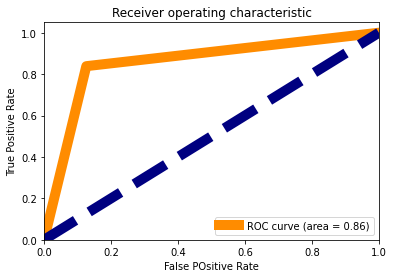

In [ ]:
rf4=BaggingClassifier(n_jobs=25, oob_score= True, random_state=25, n_estimators= 75)
model_selection(rf4,x_train,y_train,x_test,y_test)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,25)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 25, 'stack_method': 'predict'}


Accuracy of training model : 85.65
Accuracy of test data : 84.15
cv score :  81.61

Classification report for test data
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1046
           1       0.83      0.86      0.84      1024

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Classification report for training data
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      4128
           1       0.85      0.87      0.86      4150

    accuracy                           0.86      8278
   macro avg       0.86      0.86      0.86      8278
weighted avg       0.86      0.86      0.86      8278

Confusion Matrix
 [[864 182]
 [146 878]]




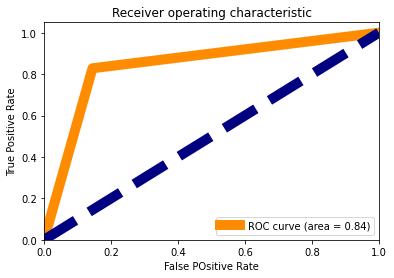

In [ ]:
rf5=StackingClassifier(estimators,n_jobs=25, stack_method= 'auto')
model_selection(rf5,x_train,y_train,x_test,y_test)


# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf,open(filename,'wb'))

We selected RandomForest Classifier model since
- it has best cross validation score among all the model and high accuracy.
- it has highest auc score of 0.86

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  85.84541062801932


# Testing Loaded Model

In [ ]:
def test_inp():
  inp = []
  i=0
  print("Enter single input\n")
  while i<19:
    inn=int(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nChurn: No")
  if prediction[0]==1:
      print("\nChurn: Yes")

In [ ]:
print("Input\n",x.head(),"\n\nOutput\n",y.head())

Input
          0    1    2    3    4         5    6    7    8    9    10   11   12  \
0  0.763277  0.0  0.0  1.0  0.0  0.013889  0.0  0.5  0.0  0.0  1.0  0.0  0.0   
1  0.562624  1.0  0.0  0.0  0.0  0.472222  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
2  0.364101  1.0  0.0  0.0  0.0  0.027778  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
3  0.785998  1.0  0.0  0.0  0.0  0.625000  0.0  0.5  0.0  1.0  0.0  1.0  1.0   
4  0.924595  0.0  0.0  0.0  0.0  0.027778  1.0  0.0  0.5  0.0  0.0  0.0  0.0   

    13   14   15   16        17        18  
0  0.0  0.0  0.0  1.0  0.666667  0.001275  
1  0.0  0.0  0.5  0.0  1.000000  0.215867  
2  0.0  0.0  0.0  1.0  1.000000  0.010310  
3  0.0  0.0  0.5  0.0  0.000000  0.210241  
4  0.0  0.0  0.0  1.0  0.666667  0.015330   

Output
 0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


 0.763277  0.0  0.0  1.0  0.0  0.013889  0.0  0.5  0.0  0.0  1.0  0.0  0.0 0.0  0.0  0.0  1.0  0.666667  0.001275 

In above table we have seen that 
- Input 0th row gives output 0 i.e Churn:No 
-Input 1st row gives output 1 i.e Churn:No 
-Input 2nd row gives output 1 i.e Churn:Yes
-Input 3rd row gives output 1 i.e Churn:No 
-Input 4th row gives output 0 i.e Churn:Yes

So we can use this input data with loaded model to test if model gives correct output

In [ ]:
test_inp()

Enter single input

Enter input 1: 0
Enter input 2: 0
Enter input 3: 0
Enter input 4: 1
Enter input 5: 0
Enter input 6: 0
Enter input 7: 0
Enter input 8: 0
Enter input 9: 0
Enter input 10: 0
Enter input 11: 1
Enter input 12: 0
Enter input 13: 0
Enter input 14: 0
Enter input 15: 0
Enter input 16: 0
Enter input 17: 1
Enter input 18: 0
Enter input 19: 0

Churn: No


In [ ]:
test_inp()

Enter single input

Enter input 1: 0
Enter input 2: 1
Enter input 3: 0
Enter input 4: 0
Enter input 5: 0
Enter input 6: 0
Enter input 7: 1
Enter input 8: 0
Enter input 9: 0
Enter input 10: 1
Enter input 11: 1
Enter input 12: 0
Enter input 13: 0
Enter input 14: 0
Enter input 15: 0
Enter input 16: 0
Enter input 17: 1
Enter input 18: 1
Enter input 19: 0

Churn: Yes
